# ASSIGNMENT 4 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

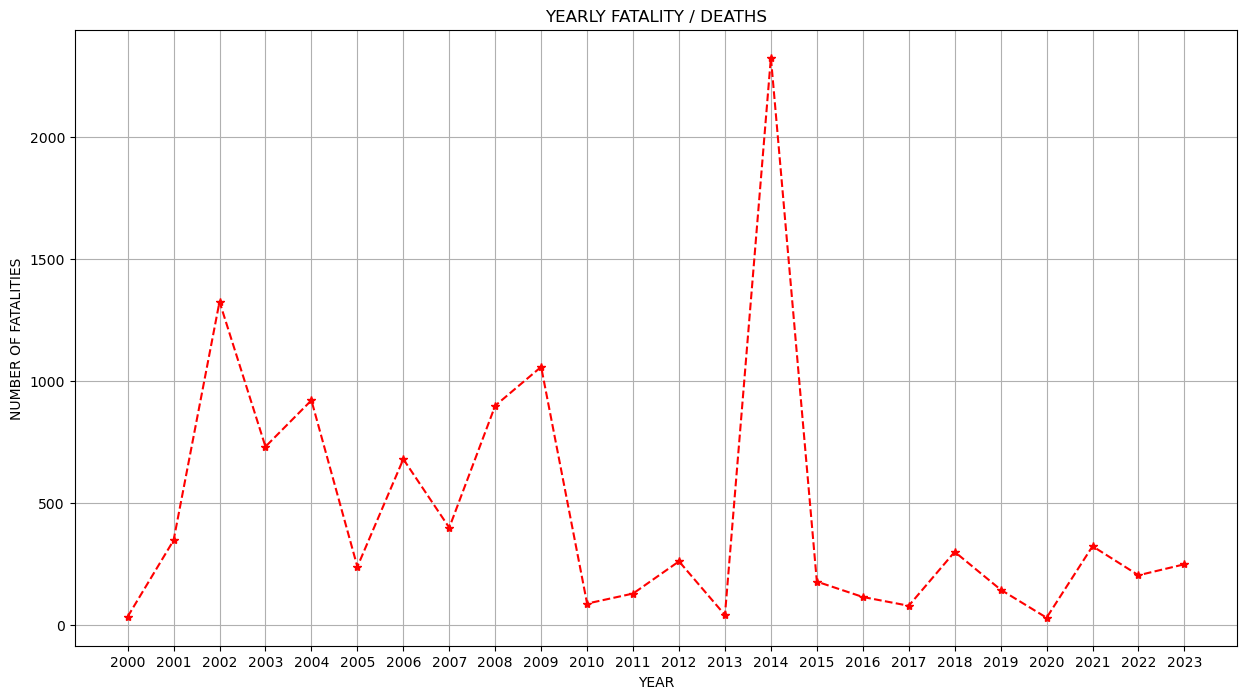

In [206]:
#Q1. Explore the dataset and identify the trends in fatalities over time. Identify any significant
#changes, spikes, or declines in the number of fatalities.
import pandas as pd
import matplotlib.pyplot as plt

file = pd.read_csv("fatalities.csv")
file
file.info()#WE USED IT TO SEE THE INFO OF OUR DATA
file.isnull().sum()# OBSERVE THE VALUES WHICH ARE NULL IN OUR DATA SET 

file['date_of_death'] = pd.to_datetime(file['date_of_death'])#CONVERTED TO THE DATE FORMAT

file['yearlyfatality'] = file['date_of_death'].dt.to_period('Y')

yearly_fatalities = file.groupby('yearlyfatality').size()

plt.figure(figsize=(15, 8))
plt.plot(yearly_fatalities.index.astype(str), yearly_fatalities.values, marker='*', linestyle='--', color='red')
plt.title('YEARLY FATALITY / DEATHS')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF FATALITIES')
plt.grid(True)
plt.show()
















name                               0
date_of_event                      0
age                                0
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
yearlyfatality                     0
dtype: int64


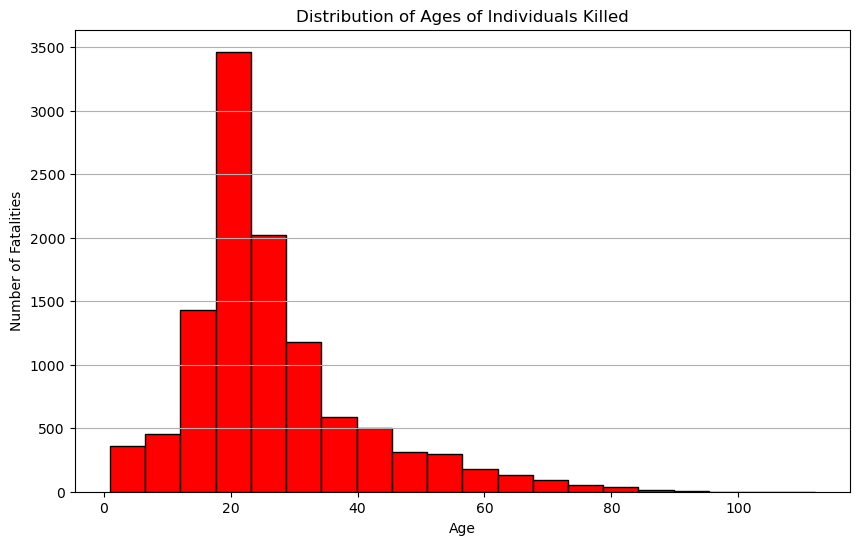

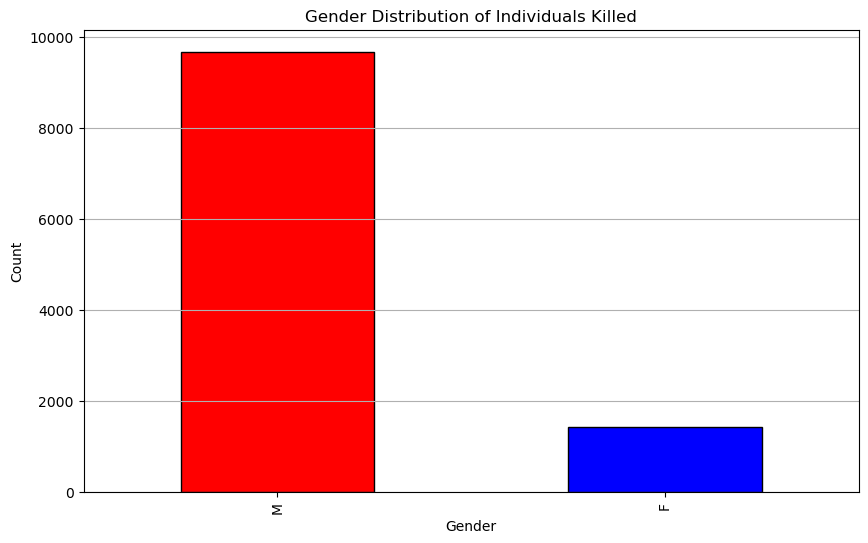

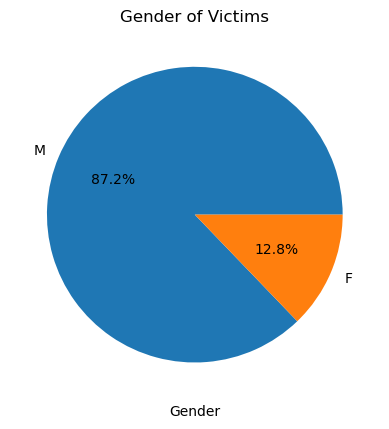

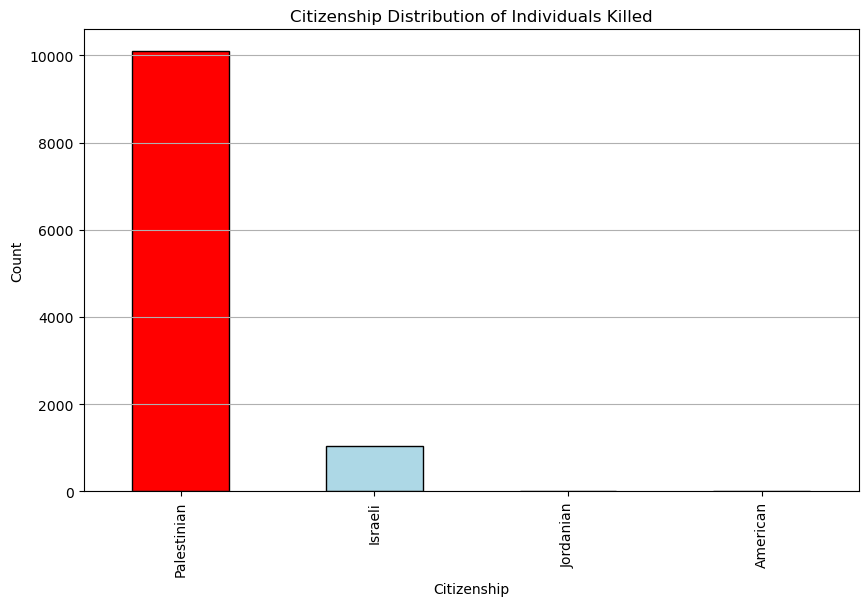

In [202]:
#Q2. Conduct an analysis by examining the age, gender, and citizenship of the individuals killed.
#Determine if there are any notable patterns or disparities in the data.

#cleaning the data
#as there are null values in age 
pr =file.isnull().sum()
print(pr)
file['age']=file['age'].fillna(file['age'].median() )
#the null values are covered with median , as the data is skwed

#we are giving the age of the individuals which were killed and by observing the histogram we can observe that mostly youth is targeted 
file['age'] = pd.to_numeric(file['age'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.hist(file['age'].dropna(), bins=20, color='red', edgecolor='black')
plt.title('Distribution of Ages of Individuals Killed')
plt.xlabel('Age')
plt.ylabel('Number of Fatalities')
plt.grid(axis='y')
plt.show()

#we have observed with bar chart that mostly male were targeted in the killing  
file['gender'].fillna(file['gender'].mode()[0])
gender_counts = file['gender'].value_counts()
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color=['red','blue'],edgecolor='black')
plt.title('Gender Distribution of Individuals Killed')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

#HERE WE HAVE GIVEN A PIE CHART TO NDERSTAND THE GENDER DISTRIBUTION MORE ACCURATELY 
file['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender of Victims')
plt.xlabel('Gender')
plt.ylabel('')




#we have seen that the majoirty of the citizens which are killed are palestenians 

citizenship_counts = file['citizenship'].value_counts()
plt.figure(figsize=(10, 6))
citizenship_counts.plot(kind='bar', color=['red','lightblue','green','blue'],edgecolor='black')
plt.title('Citizenship Distribution of Individuals Killed')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()




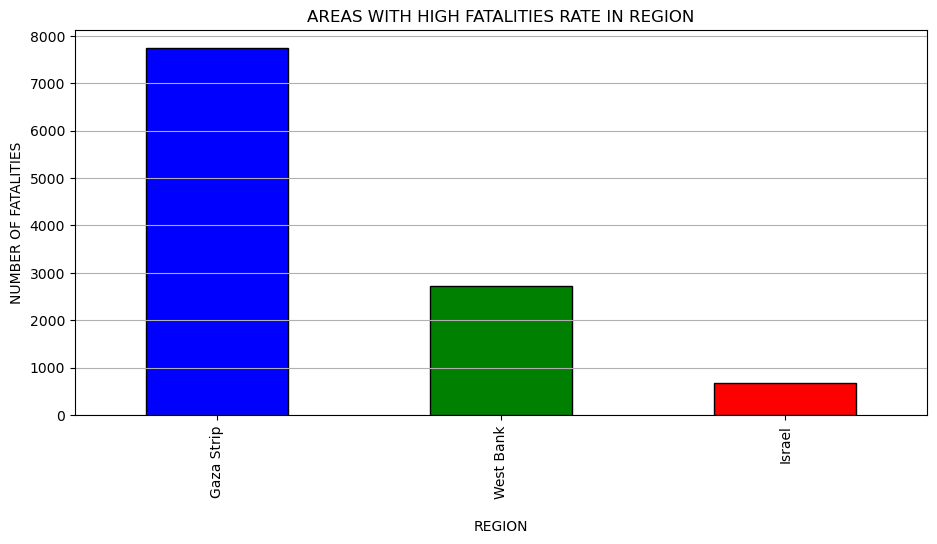

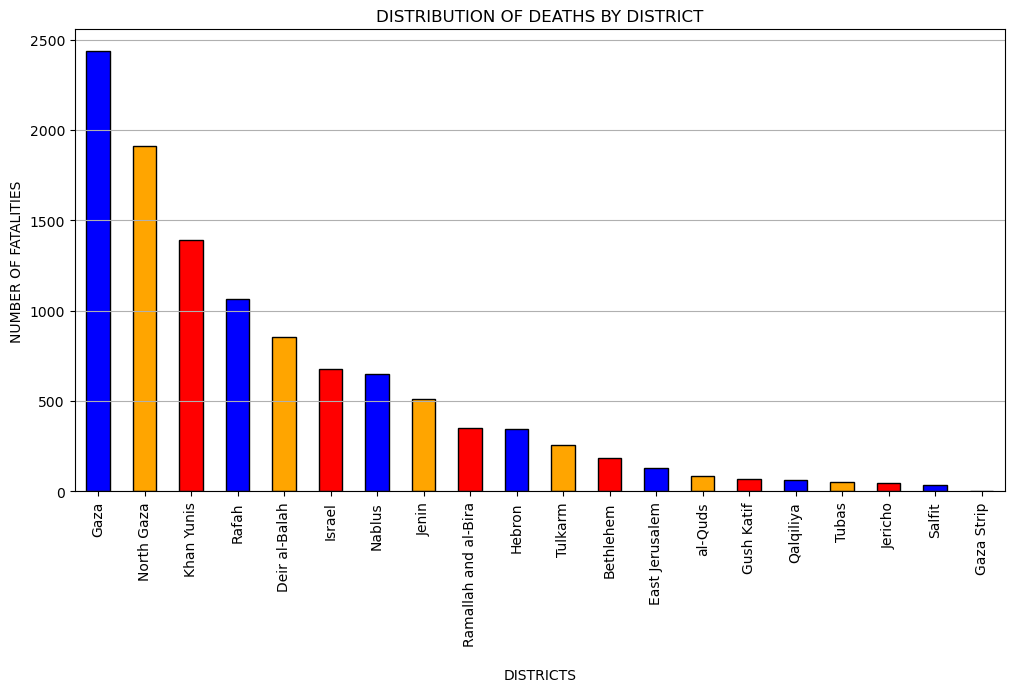

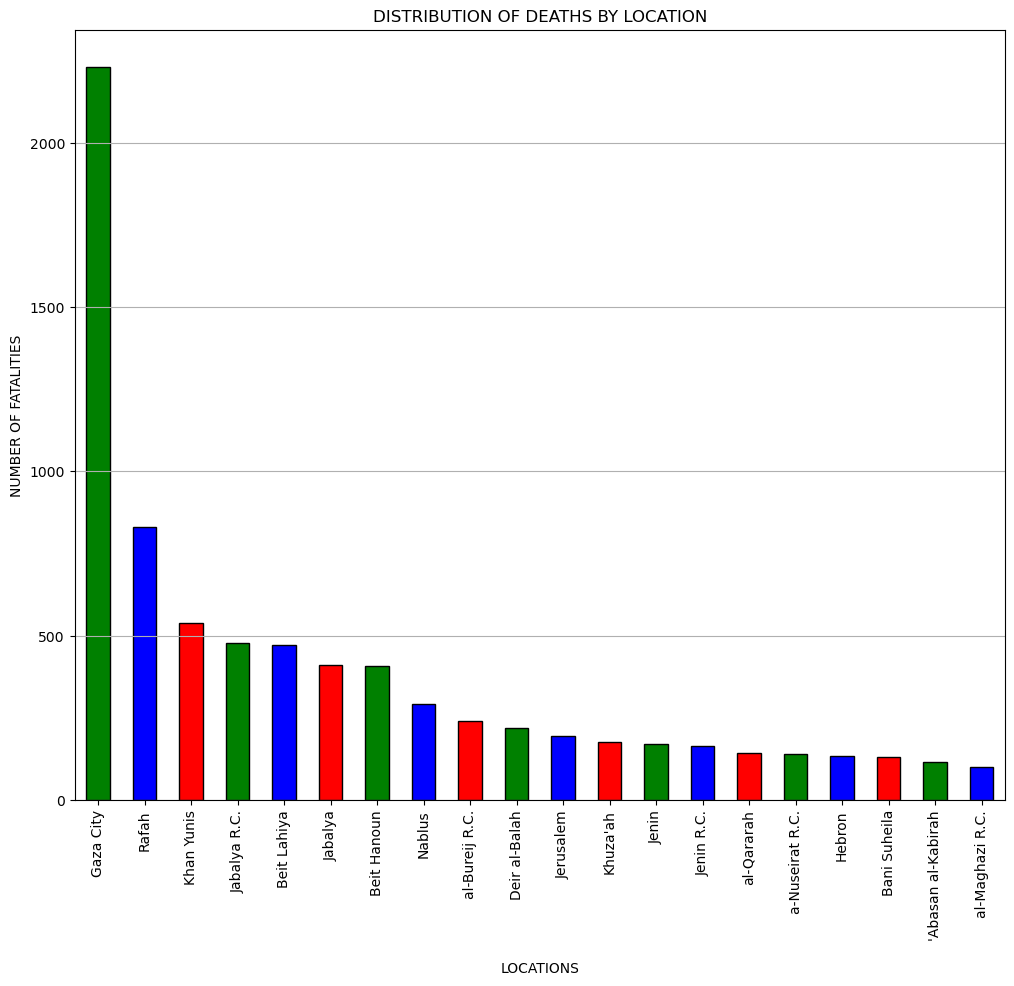

In [145]:
#Q3. Visualize the distribution of fatalities and identify areas that have experienced higher
#levels of violence.

#we can observe that the most traget area is the Gaza strip and after that it is West abnk and these are the areas where 
#palestenians are in population 
plt.figure(figsize=(11,5))
citizenship_counts = file['event_location_region'].value_counts()
citizenship_counts.plot(kind='bar', color=['blue','green', 'red'], edgecolor='black')
plt.title('AREAS WITH HIGH FATALITIES RATE IN REGION')
plt.xlabel('\nREGION')
plt.ylabel('NUMBER OF FATALITIES')
plt.grid(axis='y')
plt.show()



#the district which is most effected by the killing is Gaza after it is North Gaza 
locationdistr_counts = file['event_location_district'].value_counts()
plt.figure(figsize=(12, 6))
locationdistr_counts.plot(kind='bar', color=['blue','orange','red'],edgecolor='black')
plt.title('DISTRIBUTION OF DEATHS BY DISTRICT')
plt.xlabel('\nDISTRICTS')
plt.ylabel('NUMBER OF FATALITIES')
plt.grid(axis='y')
plt.show()


#observing that the location with the most deaths is Gaza city where palestinians lived 
location_counts = file['event_location'].value_counts().head(20)
plt.figure(figsize=(12, 10))
location_counts.plot(kind='bar', color=['green','blue','red'],edgecolor='black')
plt.title('DISTRIBUTION OF DEATHS BY LOCATION')
plt.xlabel('\nLOCATIONS')
plt.ylabel('NUMBER OF FATALITIES')
plt.grid(axis='y')
plt.show()

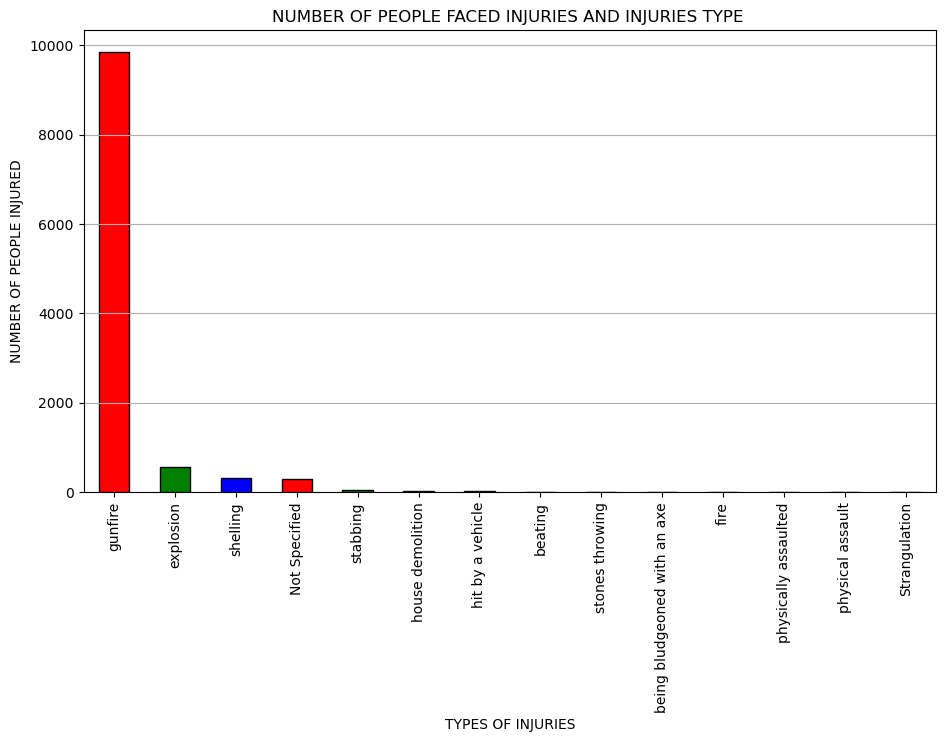

In [198]:
#Q4. Examine the types of injuries inflicted on individuals. Identify the most common types of
#injuries and assess their severity.

file['type_of_injury'].fillna('Not Specified')#filled with another category of "Not specified"
injured_counts = file['type_of_injury'].value_counts()

plt.figure(figsize=(11, 6))
injured_counts.plot(kind='bar', color=['red','green','blue'], edgecolor='black')
plt.title('NUMBER OF PEOPLE FACED INJURIES AND INJURIES TYPE ')
plt.xlabel('TYPES OF INJURIES')
plt.ylabel('NUMBER OF PEOPLE INJURED')
plt.grid(axis='y')
plt.show()

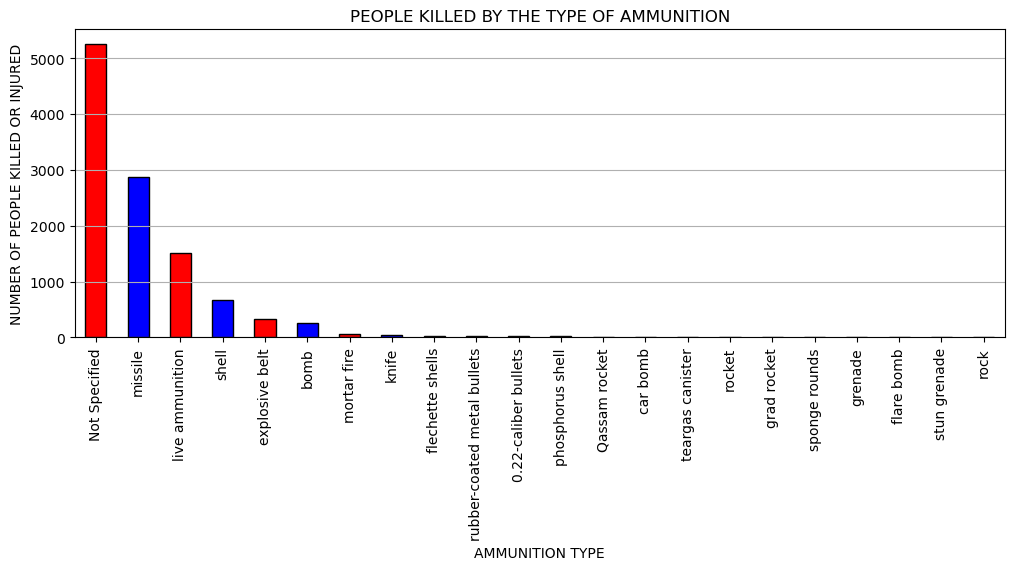

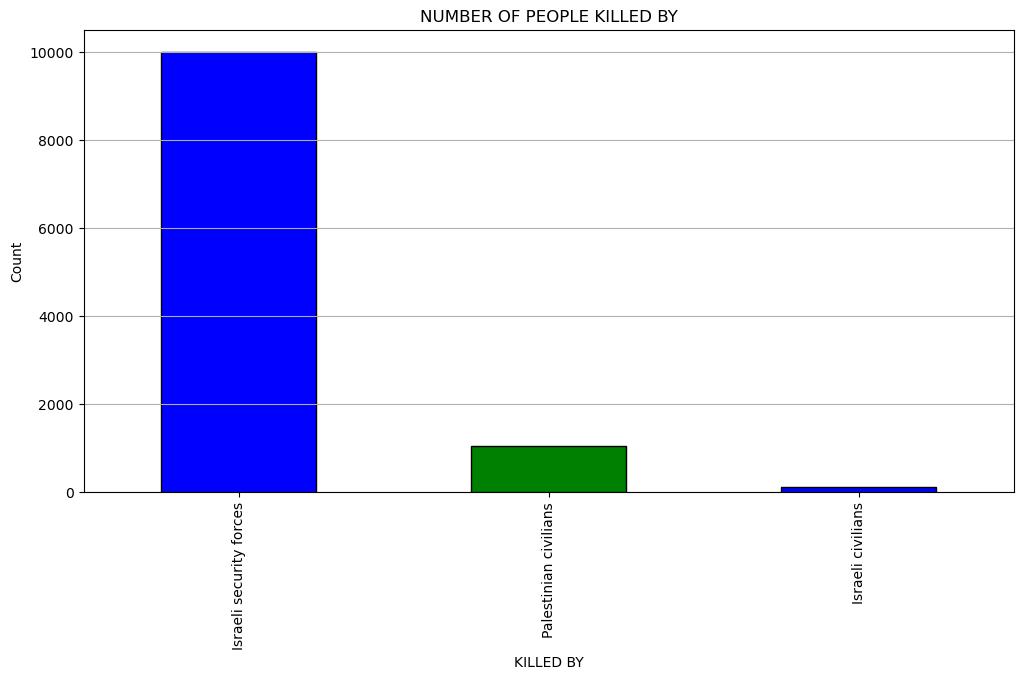

In [143]:
#Q5. Analyze the ammunition and means by which the individuals were killed. Determine the
#most frequently used weapons or methods and evaluate their impact.

file['ammunition'].fillna('Not Specified' )#also finsihed the null values with "Not specified"
ammunitiontyp_counts = file['ammunition'].value_counts()
#WE CAN OBSERVE THAT MOSTLY PEOPLE ARE INJURED AND KILLED BY MISSILES 
plt.figure(figsize=(12, 4))
ammunitiontyp_counts.plot(kind='bar', color=['red','blue'], edgecolor='black')
plt.title('PEOPLE KILLED BY THE TYPE OF AMMUNITION')
plt.xlabel('AMMUNITION TYPE')
plt.ylabel('NUMBER OF PEOPLE KILLED OR INJURED')
plt.grid(axis='y')
plt.show()

#here we have observed that the mostly people are killed by the Israeli forces

means_of_killing_counts = file['killed_by'].value_counts()
plt.figure(figsize=(12, 6))
means_of_killing_counts.plot(kind='bar', color=['blue','green'],edgecolor='black')
plt.title('NUMBER OF PEOPLE KILLED BY')
plt.xlabel('KILLED BY')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


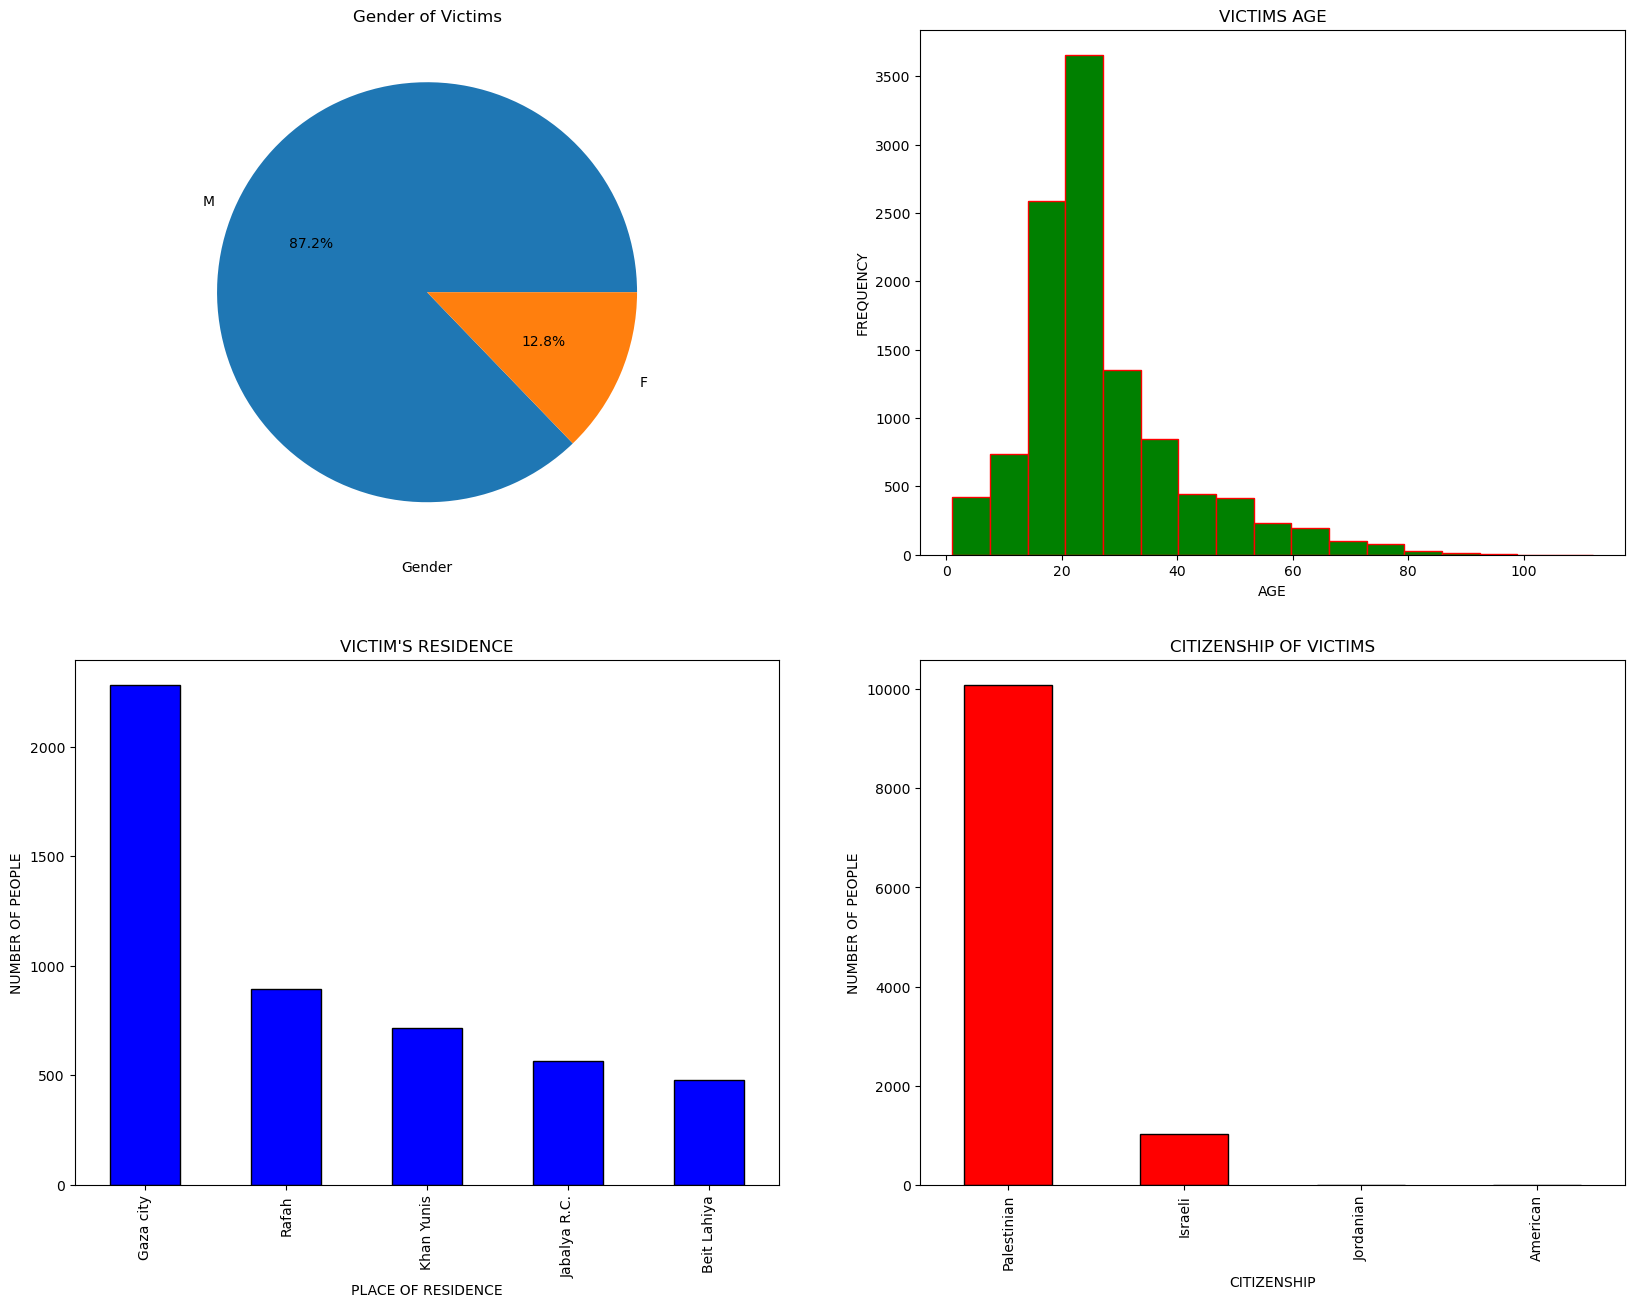

In [197]:
#Q6. Create profiles of the victims based on the available data such as age, gender, citizenship,
#and place of residence. Identify common characteristics among the victims.
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

#HERE WE HAVE MADE PROFILING AND IN THESE SUBPLOTS WE CAN SEE THAT HOW MANY DEATHS AND INJURY HAS HAPPENED ON THE BASIS OF , THEIR GENDER , AGE , THEIR RESIDENCE AND CITIZENSHIP

#IN GENDER WE OBSERVE THAT MOSTLY MALE ARE KILLED 
plt.subplot(221)
file['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender of Victims')
plt.xlabel('Gender')
plt.ylabel('')



#THE VICTIMS AGE GRAPHS SHOWS US THAT MOSTLY YOUTH IS TARGETED FROM AGE 15 TO 25
plt.subplot(222)
plt.hist(file['age'], bins=17, color='green', edgecolor='red')
plt.title('VICTIMS AGE')
plt.xlabel('AGE')
plt.ylabel('FREQUENCY')


#THE RESIDENCE WHICH IS EFFECTED THE MOST IS GAZA CITY WHICH IS POPULATED BY THE PALESTENIANS   
plt.subplot(223)
file['place_of_residence'].value_counts().head().plot(kind='bar', color='blue',edgecolor='black')
plt.title("VICTIM'S RESIDENCE")
plt.xlabel('PLACE OF RESIDENCE')
plt.ylabel('NUMBER OF PEOPLE')

#THE CITIZENS WHICH ARE MOSTLY INJURED OR KILLED ARE FROM PALESTINE
plt.subplot(224)
file['citizenship'].value_counts().plot(kind='bar' ,color='red', edgecolor='black')
plt.title('CITIZENSHIP OF VICTIMS')
plt.xlabel('CITIZENSHIP')
plt.ylabel('NUMBER OF PEOPLE')
plt.show()
